In [7]:
import pandas as pd
import numpy as np
#import pandasql
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#df = pd.read_csv('trips.csv' , usecols = ['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds', 'Trip Miles', 'Pickup Community Area'])


In [16]:
df = pd.read_csv('trips_scaled.csv')
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
pd.options.display.float_format = '{:.0f}'.format
df.head()
df.dtypes.value_counts()

The dataset has 1048575 rows and 14 columns


float64    9
object     3
int64      2
dtype: int64

In [21]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675393 entries, 0 to 8675392
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Trip Start Timestamp        object 
 2   Trip End Timestamp          object 
 3   Trip Seconds                object 
 4   Trip Miles                  float64
 5   Pickup Census Tract         float64
 6   Dropoff Census Tract        float64
 7   Pickup Community Area       float64
 8   Dropoff Community Area      float64
 9   Fare                        float64
 10  Tip                         int64  
 11  Additional Charges          float64
 12  Trip Total                  float64
 13  Shared Trip Authorized      bool   
 14  Trips Pooled                int64  
 15  Pickup Centroid Latitude    float64
 16  Pickup Centroid Longitude   float64
 17  Pickup Centroid Location    object 
 18  Dropoff Centroid Latitude   float64
 19  Dropoff Centroid Long

In [3]:
pd.options.display.float_format = '{:.0f}'.format
df.describe()

,TripSeconds,TripMiles,PickupCommunityArea,DropoffCommunityArea,Fare,PickupCentroidLatitude,PickupCentroidLongitude,DropoffCentroidLatitude,DropoffCentroidLongitude,AvgCostMile,DayofWeek
count,2444352,2444352,2280693,2257251,2444352,2283286,2283286,2259822,2259822,2443698,2444352
mean,1150,7,26,26,12,42,-88,42,-88,3,5
std,825,7,21,21,10,0,0,0,0,2,2
min,0,0,1,1,0,42,-88,42,-88,0,1
25%,572,2,8,8,5,42,-88,42,-88,2,3
50%,920,4,24,24,10,42,-88,42,-88,2,5
75%,1490,8,32,32,15,42,-88,42,-88,3,6
max,61320,313,77,77,440,42,-88,42,-88,325,7


In [74]:
#Separate categorical and numerical columns in the dataframe
df.dtypes == 'object'
    

TripID                       True
TripStartTimestamp           True
TripEndTimestamp             True
TripSeconds                  True
TripMiles                   False
PickupCommunityArea         False
DropoffCommunityArea        False
Fare                        False
PickupCentroidLatitude      False
PickupCentroidLongitude     False
DropoffCentroidLatitude     False
DropoffCentroidLongitude    False
dtype: bool

In [75]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['TripMiles', 'PickupCommunityArea', 'DropoffCommunityArea', 'Fare',
       'PickupCentroidLatitude', 'PickupCentroidLongitude',
       'DropoffCentroidLatitude', 'DropoffCentroidLongitude'],
      dtype='object')
Index(['TripID', 'TripStartTimestamp', 'TripEndTimestamp', 'TripSeconds'], dtype='object')


In [76]:
df[num_vars].isnull().sum()

TripMiles                       30
PickupCommunityArea         576065
DropoffCommunityArea        650750
Fare                             0
PickupCentroidLatitude      566745
PickupCentroidLongitude     566745
DropoffCentroidLatitude     642129
DropoffCentroidLongitude    642129
dtype: int64

In [77]:
df[num_vars][df == 0].sum(axis=0)

TripMiles                  0
PickupCommunityArea        0
DropoffCommunityArea       0
Fare                       0
PickupCentroidLatitude     0
PickupCentroidLongitude    0
DropoffCentroidLatitude    0
DropoffCentroidLongitude   0
dtype: float64

In [83]:
df[cat_vars].isnull().sum()

TripID                0
TripStartTimestamp    0
TripEndTimestamp      0
TripSeconds           0
dtype: int64

In [18]:
df = pd.read_csv('trips.csv' , usecols = ['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds', 'Trip Miles', 'Fare', 'Pickup Community Area', 'Dropoff Community Area', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude'])
df.columns = df.columns.str.replace(' ', '')
#df.head()
#df_locations_clean = df_locations.dropna()
#df_locations_clean = df_locations_clean.astype({'PickupCommunityArea':'int32','DropoffCommunityArea':'int32'})
#df_locations_clean.dtypes

In [39]:
#def label_pickup (row):
#   if row ['PickupCommunityArea'] == 44:
#        return 'Test'
#df.apply (lambda row: label_pickup(row), axis=1)
#df=df.replace(['PickupCommunityArea'].replace(["76"],value='OHare')

In [29]:
#add calculated column to dataframe
df.assign(AvgFareMile=lambda x: x.Fare / x.TripMiles)


,TripID,TripStartTimestamp,TripEndTimestamp,TripSeconds,TripMiles,PickupCommunityArea,DropoffCommunityArea,Fare,PickupCentroidLatitude,PickupCentroidLongitude,DropoffCentroidLatitude,DropoffCentroidLongitude,AvgFareMile
0,001310147fb02373d31c3a61a9d431f5c1a3bbc5,09/01/2019 12:00:00 AM,09/01/2019 12:15:00 AM,935,3,4,7,18,42,-88,42,-88,5
1,00228798b148a8b410a3bd78e5c766558254ae21,09/01/2019 12:00:00 AM,09/01/2019 12:15:00 AM,"1,128",5,44,46,8,42,-88,42,-88,2
2,002a8d7170d7d84508b5a83cfc3be9ba2bd61a68,09/01/2019 12:00:00 AM,09/01/2019 12:15:00 AM,995,6,8,6,22,42,-88,42,-88,4
3,003bd5a48b6b238a97c376d96652fdbc7f866daa,09/01/2019 12:00:00 AM,09/01/2019 12:15:00 AM,"1,147",9,32,4,28,42,-88,42,-88,3
4,005f27b6e77816b97a357e79daa60b6b8c03ee68,09/01/2019 12:00:00 AM,09/01/2019 12:00:00 AM,569,4,nan,6,8,nan,nan,42,-88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675388,ff251de1fe6659568fc9e01007f70837b2393a90,09/30/2019 12:00:00 AM,09/30/2019 12:00:00 AM,638,2,28,32,10,42,-88,42,-88,4
8675389,ff43e10ba452ca9cabb0af65a19b080e1bc1f844,09/30/2019 12:00:00 AM,09/30/2019 12:00:00 AM,538,2,24,8,8,42,-88,42,-88,3
8675390,ff63e52c15a16fe2289ba8723812ae18df5a41ad,09/30/2019 12:00:00 AM,09/30/2019 12:15:00 AM,"1,140",13,nan,22,18,nan,nan,42,-88,1
8675391,ff9e26fb3399546e37baf2c39872db9418be4679,09/30/2019 12:00:00 AM,09/30/2019 12:15:00 AM,912,2,71,69,8,42,-88,42,-88,3


In [20]:
from csv import writer
from csv import reader
# Sample df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)
df.to_csv (r'C:\Users\my63valiant\Documents\Python Scripts\Code\trips_new_column.csv', index = False, header=True)

(0.0, 20.0)

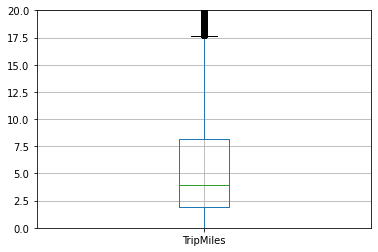

In [45]:
distance_box_and_whisker = df.boxplot(column='TripMiles')
distance_box_and_whisker.set_ylim(0, 20)


In [ ]:
areas = requests.get('https://data.cityofchicago.org/resource/igwz-8jzy.json').json()
areas_df = pd.DataFrame(areas)[['community','area_num_1']]
areas_df.community = areas_df.community.str.title()
areas_dict = dict(zip(areas_df.area_num_1, areas_df.community))

In [ ]:
df_locations_clean['pickup_area'] = df_locations_clean['pickup_community_area'].map(lambda x: areas_dict[str(x)])
df_locations_clean['dropoff_area'] = df_locations_clean['dropoff_community_area'].map(lambda x: areas_dict[str(x)])
df_locations_clean

In [ ]:
#df["PickupAreaName"] = df["PickupCommunityArea"].apply(pickup)

In [17]:
df['TripStartTimestamp'] = pd.to_datetime(df['TripStartTimestamp'])
# calculate mask
mask = df['TripStartTimestamp'].between('2019-09-29', '2019-10-01')
# output masked dataframes
df[mask].to_csv('trip_scaled_days6.csv', index=False)
df[mask].to_csv('trip_scaled_days7.csv', index=False)